# TP2 - Exercice 1 - Statistiques sur la taille des hommes et des femmes

(Question 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

taille_h = np.loadtxt("taille_h.txt")
taille_f = np.loadtxt("taille_f.txt")

# On arrondit

taille_h = list(map(int, taille_h))
taille_f = list(map(int, taille_f))

(Question 2)

Taille hommes


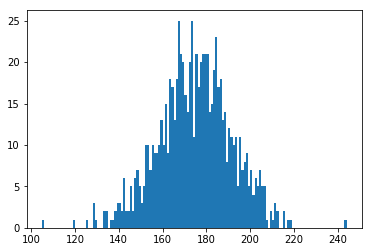

Taille femmes


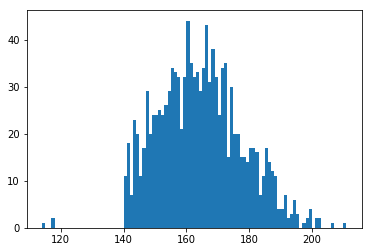

Taille hommes/femmes


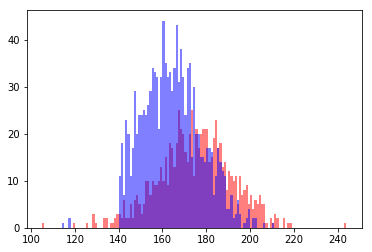

In [2]:
# Distribution de la taille des hommes et des femmes

min_f = np.min(taille_f)
min_h = np.min(taille_h)

max_f = np.max(taille_f)
max_h = np.max(taille_h)

print("Taille hommes")
plt.hist(taille_h, bins=max_h-min_h)
plt.show()

print("Taille femmes")
plt.hist(taille_f, bins=max_f-min_f)
plt.show()

print("Taille hommes/femmes")
plt.hist(taille_h, bins=max_h-min_h, alpha=0.5, color="red")
plt.hist(taille_f, bins=max_f-min_f, alpha=0.5, color="blue")
plt.show()

(Question 3)

Probabilité de la taille selon homme/femme


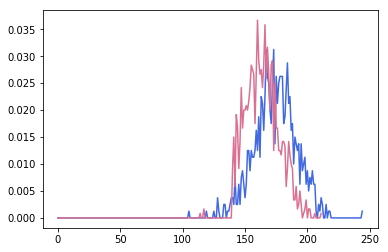

In [3]:
# Pour chaque taille, probabilité de faire telle taille, que tu sois 
# homme ou femme

proba_h = []
proba_f = []

# Calcul de la probabilité des tailles pour hommes
bincount_h = np.bincount(taille_h)
max_proba = np.sum(bincount_h)
for i in range(len(bincount_h)):
    proba_h.append(bincount_h[i]/max_proba)

# Calcul de la probabilité des tailles pour femmes
bincount_f = np.bincount(taille_f)
max_proba = np.sum(bincount_f)
for i in range(len(bincount_f)):
    proba_f.append(bincount_f[i]/max_proba)

print("Probabilité de la taille selon homme/femme")
plt.plot(proba_h, color="royalblue")
plt.plot(proba_f, color="palevioletred")
plt.show()

Probabilité de la taille selon homme/femme et loi marginale empirique


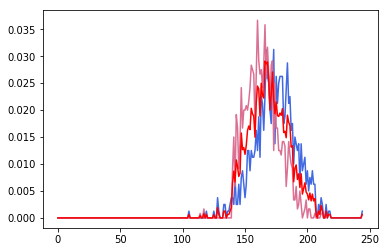

In [4]:
# Calcul de la probabilité de taille pour homme/femme
# p(x1) = p(X1|X2 = femme) * p(X1 = femme) + p(X1|X2 = homme)
#         * p(X1 = homme)

proba_hf = []
len_proba_f = len(proba_f)
len_proba_h = len(proba_h)

for i in range(len(proba_h)):
    proba_hf.append((proba_f[i] if (len_proba_f > i) else 0) * 0.495 +
                    (proba_h[i] if (len_proba_h > i) else 0) * 0.505)

print("Probabilité de la taille selon homme/femme et loi marginale empirique")
plt.plot(proba_h, color="royalblue")
plt.plot(proba_f, color="palevioletred")
plt.plot(proba_hf, color="red")
plt.show()

(Question 4)

Loi marginale empirique taille h/f


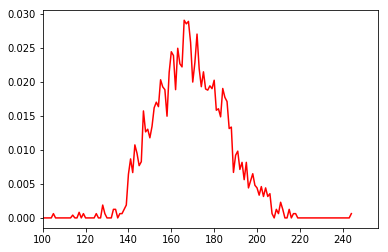

In [5]:
print("Loi marginale empirique taille h/f")
plt.plot(proba_hf, color="red")
plt.xlim(xmin=100)
plt.show()

Taille la plus fréquente (mode) : 166cm
Taille moyenne (espérance) : 169.13551875cm
Taille médiane (médiane) : 167cm
Loi marginale empirique taille h/f


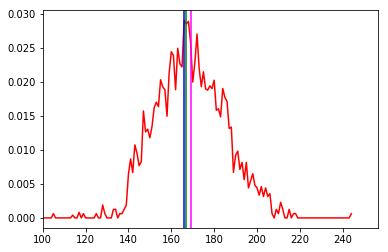

In [12]:
# Calcul de l'espérance
esperance = np.dot(np.array(proba_hf), np.array([x for x in range(len(proba_hf))]))

# Calcul de la médiane
bincount_f_extend = list(bincount_f)
for _ in range(len(bincount_h)-len(bincount_f)):
    bincount_f_extend.append(0)

superbin = bincount_f_extend+bincount_h
s = 0
for i in range(len(superbin)):
    s += superbin[i]
    if s > np.sum(superbin)//2:
        mediane = i
        break
        
print("Taille la plus fréquente (mode) : {}cm".format(np.argmax(proba_hf)))
print("Taille moyenne (espérance) : {}cm".format(esperance))
print("Taille médiane (médiane) : {}cm".format(mediane))

print("Loi marginale empirique taille h/f")
plt.plot(proba_hf, color='red')
plt.xlim(xmin=100)
plt.axvline(x=np.argmax(proba_hf),color='blue')
plt.axvline(x=esperance,color='magenta')
plt.axvline(x=mediane, color='green')
plt.show()

(Question 5)

In [7]:
# Calcul de la proba de chaques intervalles

proba_180_185_h = 0
for i in proba_h[181:185]:
    proba_180_185_h += i

proba_180_185_f = 0
for i in proba_f[181:185]:
    proba_180_185_f += i
    
print("Entre 1.8m et 1.85m, on est plus probablement du genre ", end='')
if proba_180_185_h > proba_180_185_f:
    print("Masculin")
else:
    print("Feminin")

print("Masc: {} - Femin: {}".format(proba_180_185_h, proba_180_185_f))
    
proba_160_165_h = 0
for i in proba_h[161:165]:
    proba_160_165_h += i

proba_160_165_f = 0
for i in proba_f[161:165]:
    proba_160_165_f += i

print("Entre 1.6m et 1.65m, on est plus probablement du genre ", end='')
if proba_160_165_h > proba_160_165_f:
    print("Masculin")
else:
    print("Feminin")
    
print("Masc: {} - Femin: {}".format(proba_160_165_h, proba_160_165_f))

Entre 1.8m et 1.85m, on est plus probablement du genre Masculin
Masc: 0.08875000000000001 - Femin: 0.042499999999999996
Entre 1.6m et 1.65m, on est plus probablement du genre Feminin
Masc: 0.07375 - Femin: 0.1075


(Question 6)

In [8]:
# Calcul de écart type
def ecart_type(stats):
    
    # Calcul de la moyenne
    mean = np.mean(stats)
    
    # Soustraction de la moyenne
    stats_sous = stats - mean

    # Calcul du carré
    stats_square = np.square(stats_sous)

    # Sommes des carrés
    sum_square = np.sum(stats_square)
    
    # Division par le nombre d'exemple
    variance = sum_square/len(stats)
    
    return np.sqrt(variance)
    
print("Ecart type des hommes : {}".format(ecart_type(taille_h)))
print("Ecart type des femmes : {}".format(ecart_type(taille_f)))

Ecart type des hommes : 16.7777277495345
Ecart type des femmes : 13.353818404195193


(Question 7)

In [9]:
# Calcul du moment centrée d'ordre 3
def skewness(stats):
    
    # Calcul de la moyenne
    mean = np.mean(stats)
    
    # Soustraction de la moyenne
    stats_sous = stats - mean
    
    # On divise par l'écart type
    stats_div = stats_sous / ecart_type(stats)
    
    # On met au cube
    stats_cube = np.power(stats_div, 3)
    
    # On fait la somme
    sum_cube = np.sum(stats_cube)
    
    return sum_cube * 1/len(stats)

print("Skewness des hommes : {}".format(skewness(taille_h)))
print("Skewness des femmes : {}".format(skewness(taille_f)))

Skewness des hommes : -0.14083598511212986
Skewness des femmes : 0.2512368460803612


(Question 8)

3391.30616075
34
34


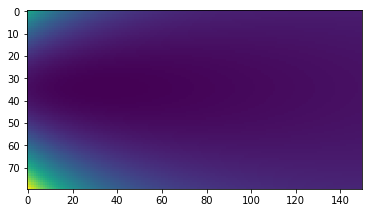

In [10]:
# Calcul du NLL (Negative Log-Likelihood)
def NLL(mean, ecart, stats):
    
    # Soustraction de la moyenne
    stats_sous = stats - mean

    # On met au carré
    stats_square = np.square(stats_sous)
    
    # On fait la somme totale
    stats_sum = np.sum(stats_square)
    
    # On multiplie par 1/(2sigma^2)
    stats_first = stats_sum * (1/(2 * (ecart*ecart)))
    
    # On calcule la deuxième partie : (-n/2) * log(2 pi sigma^2)
    second = (-len(stats)/2) * np.log(2 * np.pi * (ecart * ecart))
        
    return -(second - stats_first)

mean = np.arange(140, 220)
sig = np.arange(10, 40, 0.2)

NLL_tab = []
for m in range(len(mean)):
    NLL_tab.append([])
    for s in sig:
        NLL_tab[m].append(NLL(mean[m], s, taille_h))

argm = np.argmin(NLL_tab)
        
print(NLL_tab[argm//150][argm%150])

m = argm//150
u = argm%150

print(m)
print(u)

plt.imshow(NLL_tab)
plt.show()

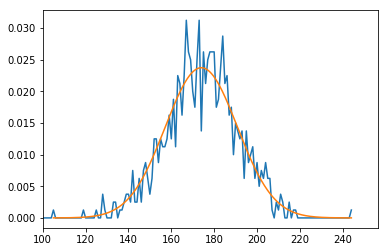

In [11]:
"""
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
"""
import matplotlib.mlab as mlab

plt.plot(proba_h)
plt.xlim(xmin=100)

x = np.linspace(np.min(taille_h), np.max(taille_h), len(taille_h))
plt.plot(x, mlab.normpdf(x, 174, 16.8))

"""
x = np.linspace(140, 220, 100)
plt.plot(x, mlab.normpdf(x, 34, 34))
"""

plt.show()